<a href="https://colab.research.google.com/github/pedd1-Srividya/DS-AI-ML-And-Web-Devolopment-Practice/blob/master/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Artificial Intelligence**

**Artificial Intelligence:**

Smart Machine

Memics human actions

**Artificial:**

Man-Made

**Intelligence:**

Ability to learn, understand and solve problems

**AI:**

Predicting Future isn't magic, its Artificial Intelligence.-Dave Waters

science and Engineering of building intelligent machines.

**Working:**

Data--->Algorithm--->AI Machines

**Applications of AI:**

NLP(Natural Langugage process)-ChatGPT

Image and Video Analysis

Health care

Autonomous Vehicle(Self-Driving Car)

Recommendation System(NETFLIX)

Virtual Assistant

**AI Related Technologies:**

Artificial Intelligence-Engineering of making Intelligent Machines and Programs

Machine learning-Ability to learn without being explicitly programmed

Deep Learning-Learning based on Deep Neural Network

In [ ]:
# @title Computer Vision(CV)
'''
Uploading/Searching Google Lens
Face Recognition
Cameras
Self-Driving Cars
CCTV

AI Tools:
* OpenCV - Open-Source library.
* TensorFlow - For deep learning-based vision tasks.
* PyTorch - Research-heavy vision models
'''

'\n\n'

In [ ]:
# Installing OpenCV
!pip install --quiet opencv-python

In [ ]:
# @title Recognising Face in Passport size photo
# Step-1: Install and Importing Important Libraries
# Import OpenCv library for CV operations
import cv2
# Importing matplotlib for displaying images in colab
import matplotlib.pyplot as plt
# Import numpy for array operations (Images are numpy arrays)
import numpy as np
# Import files utility to upload images from your local machine into colab
from google.colab import files
# Import google drive
from google.colab import drive

In [ ]:
# Step 2: Uploading the images
uploaded=files.upload()
# Get the first uploaded filename
# next(iter(uploaded))returns the first key in the uploaded dict the file name and increases the file versions of it as user upload the same file
filename=next(iter(uploaded))
# Print filename so we know which file was uploaded recently or succesfully

print('Uploaded file',filename)

Saving passportsize.jpg to passportsize (1).jpg
Uploaded file passportsize (1).jpg


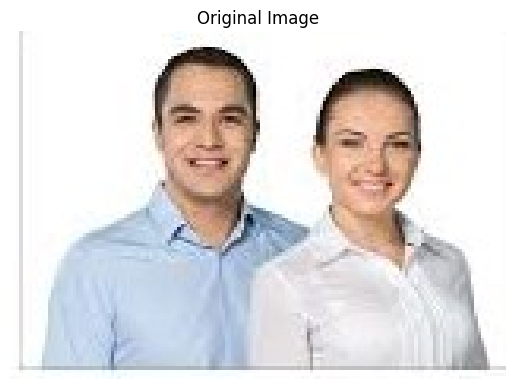

In [ ]:
# Step 3: Display the image
# read the uploaded image from the disk into numpy array using OpenCV
img=cv2.imread(filename)
# Convert RGB for correct color display in matplotlib
image_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Display image using matplotlib(cv2.imshow() won't work in colab)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

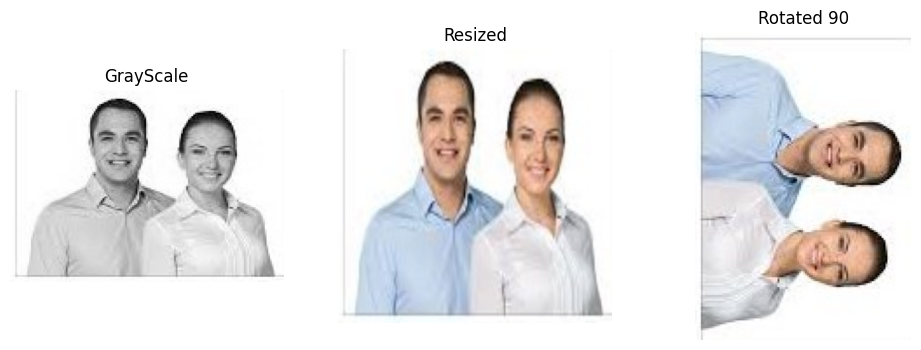

In [ ]:
# Step 4: Image Transformation
'''
Transformations are used to prepare images before analysis or model training.

Transformations                   Purpose
Grayscale                         Removes color, keeps intensity - simpler to process.
Resize                            Ensures uniform input dimensions for models
Rotate                            Change orientation for augmentation.

Real-World Application
In passport photo verification system, images are resized and converted to grayscale befor face recognising.
'''
# Convert to Grayscale (reduce image into single intensity channel)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Resize the image to 300x300 pixels
resized=cv2.resize(img,(300,300))
# Rotate the image by 90 degrees clock wise
rotated=cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
# Plot all images together
plt.figure(figsize=(12,4))
# GrayScale
plt.subplot(1,3,1)
plt.imshow(gray,cmap='gray')
plt.title('GrayScale')
plt.axis('off')

# Resized
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(resized,cv2.COLOR_BGR2RGB))
plt.title('Resized')
plt.axis('off')

# Rotated
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(rotated,cv2.COLOR_BGR2RGB))
plt.title('Rotated 90')
plt.axis('off')

plt.show()

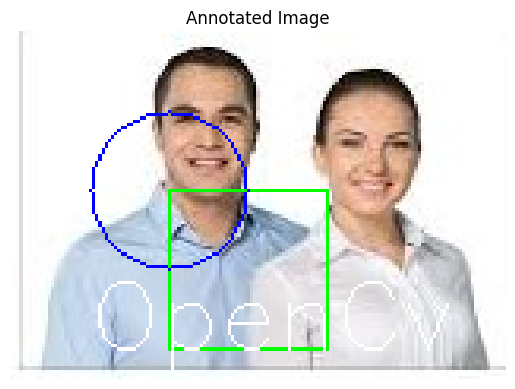

In [ ]:
# Step 5: Drawing Shapes and Adding Text
'''
OpenCV allows you to draw lines, rectangles, circles and text - useful for making or annotating images.
Real-World application

Used in:
* Highlighting detected faces.
* Annotating objects in surveillance feeds.
* Drawing bounding boxes during model training.
'''
# Make a copy of the image so the original remains unchanged
img_copy=img.copy()
# Draw a green rectangle to the images
cv2.rectangle(img_copy,(50,50),(100,100),(0,255,0),1)
# Draw a blue circle
cv2.circle(img_copy,(50,50),25,(255,0,0),1)
# Write text on image
cv2.putText(img_copy,'OpenCv Demo',(25,100),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),1)
# Convert BGR to RGB for Display
img_rgb=cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(img_rgb)
plt.title('Annotated Image')
plt.axis('off')
plt.show()

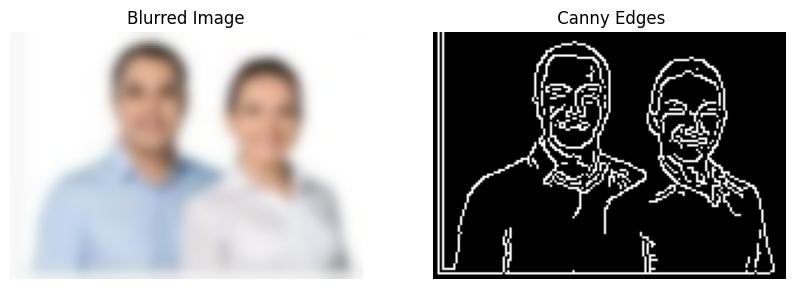

In [ ]:
# Step 6: Image filtering (Blurring and Edge detection)
'''
Filtering helps reduce noise and extract useful features.

Gaussian Blur             Smoothens the image, reduces noise.
Canny Edge Detection      Detects objects boundaries
'''
# Apply Gaussian Blur to reduce noise
blurred=cv2.GaussianBlur(img,(15,15),0)

# Convert Image to Grayscale for edge detection
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Detect the edges using canny edge detection
edges=cv2.Canny(gray_img,100,200)

# Display Blurred and Edge Images
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(blurred,cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges,cmap='gray')
plt.title(' Canny Edges')
plt.axis('off')

plt.show()

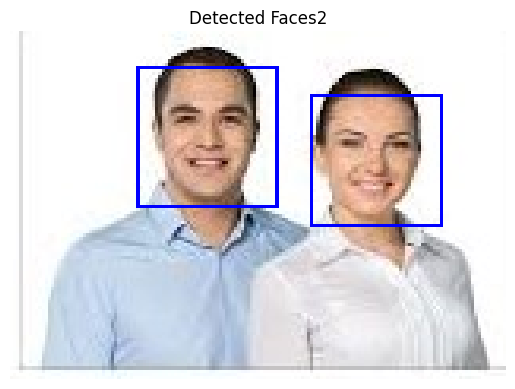

In [ ]:
# Step 7: Face detection using Haar Cascade
'''
Face detection locates faces withing an image using pre-trained models.
The Haar Cascade Classifier is one of OpenCV's model methods for detecting faces.
'''
# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

# Convert image into grayscale (as detector works better on grayscale)
gray_face=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Detect the faces (returns x,y , width and height for each detected faces)
faces=face_cascade.detectMultiScale(gray_face, scaleFactor=1.1,minNeighbors=5,minSize=(30,30))

# Draw rectangles around detected faces
img_faces=img.copy()
for (x,y,w,h) in faces:
  cv2.rectangle(img_faces,(x,y),(x+w,y+h),(255,0,0),1)
# Convert to rGB for display
img_faces_rgb=cv2.cvtColor(img_faces,cv2.COLOR_BGR2RGB)

# Show detected faces
plt.imshow(img_faces_rgb)
plt.title(f'Detected Faces{len(faces)}')
plt.axis('off')
plt.show()

# NLP(Natural Language Processing)

In [ ]:
# @title Definition
'''
NLP is a subfeild of AI that focuses on enabling computer to understand, interpret and generate human language.

Why NLP is important?
Humans communicate using text and speech - and NLP allows machine to:
* understand human qureies
* respond intelligently
* Analyze text data from emails, reveiws and documents.

Real-World Applications
ChatGPT & Virtual Assistants
Sentiment Analysis
News catgorization
Spam Detection
Language Translation
'''

In [ ]:
# @title Step 1: Install and Import Required Libraries
# Install NLP libraries
!pip install nltk textblob
# Import NLTK (Natural Language Tool Kit) for text preprocessing
import nltk
# Import TextBlob for simple sentiment analysis and NLP Tasks
from textblob import TextBlob
# Download essential NLTK data (Tokenizers,stopwords)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# @title Step 2
'''
Let's define some example of movie reviews.
'''
review1 = 'Must watch movie it was a great family entertainer.'
review2 = 'It was okay, and the story was fine and little boring.'
review3 = 'The film was awful and a complete waste of time.'

In [ ]:
# @title Step 3: Sentiment Analysis with TextBlob
# Analyze each review using TextBlob
for review in [review1, review2, review3]:
  blob=TextBlob(review)
  sentiment=blob.sentiment.polarity # Polarity will give values from -1 to +1

  # Interpret sentiment
  if sentiment>0.3:
    label='Positive'
  elif sentiment<-0.3:
    label='Negative'
  else:
    label='Neutral'
  # Print Result
  print(f'Review:{review}')
  print(f'Sentiment score:{sentiment}➡️{label}')

Review:Must watch movie it was a great family entertainer.
Sentiment score:0.8➡️Positive
Review:It was okay, and the story was fine and little boring.
Sentiment score:-0.06770833333333331➡️Neutral
Review:The film was awful and a complete waste of time.
Sentiment score:-0.3666666666666667➡️Negative


In [ ]:
# @title Step 4: Tokenization and Stopword Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Sample text for processing
text='Natural language Processing makes the machine understand human language.'
# Tokenize (split text into words)
tokens=word_tokenize(text)
print("Tokens:",tokens)
# Load stopwords (common words that add little meaning)
stop_words=set(stopwords.words('english'))
# Remove Stopwords
filtered_words=[word for word in tokens if word.lower() not in stop_words]# Filtering all the words which has little meaning
print("After Stopword Removal",filtered_words)

Tokens: ['Natural', 'language', 'Processing', 'makes', 'the', 'machine', 'understand', 'human', 'language', '.']
After Stopword Removal ['Natural', 'language', 'Processing', 'makes', 'machine', 'understand', 'human', 'language', '.']


In [ ]:
# @title Step 5: NLP Project Code
user_text=input('Enter your review or comment')
# Create a textBlob object
blob=TextBlob(user_text)
# Get the sentiment score -1 to +1
sentiment=blob.sentiment.polarity
# Determine the sentiment level
if sentiment>0.3:
  label='Positive😊'
elif sentiment<-0.3:
  label='Negative😒'
else:
  label='Neutral☺️'
print("Sentiment Analysis score")
print(f'Text:{user_text}')
print(f'Sentiment Score:{sentiment}')
print(f'Sentiment:{label}')

Enter your review or commentthe movie was very bad we will never watch again
Sentiment Analysis score
Text:the movie was very bad we will never watch again
Sentiment Score:-0.9099999999999998
Sentiment:Negative😒


# Object Detection using CV

In [ ]:
# Object Detection
'''
Object Detection locates objects in an image and labels them with a class + confidence. It's broader than classification because detection retruns where each object is.

Why YOLOv8?
YOLOv8 is a modern, easy-to-use implementation of YOLO family with a simple Python API for inference & training. Excellent for teaching quick demos and moving to custom datasets.

Real-World Examples
* Autonomous vehicles: detect pedestrians, cars, traffic signals.
* Retail: shelf monitoring, automated checkout.
* Industrial inspection: detect defective parts on a conveyor.
* Security: detect intruders, suspicious objects in CCTV feeds.
'''

In [ ]:
# @title Step 1: Installing and Importing Important libraries and models
# Install ultralytics YOLOv8
!pip install -q ultralytics opencv-python-headless matplotlib
# Import OenCv for Image read/format
import cv2
# Import the YOLO inference from ultralytics
from ultralytics import YOLO
# Import Matplotlib to display images
import matplotlib.pyplot as plt
# Import Numpy for numeric operations
import numpy as np
# Import files helper to upload local files
from google.colab import files
# Print versions so we can see what was installed
import ultralytics, sys
print('ultralytics version',ultralytics.__version__)
print('OpenCV version',cv2.__version__)
print('Python version',sys.version)

ultralytics version 8.3.241
OpenCV version 4.12.0
Python version 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
# @title Step 2: Upload the image
uploaded=files.upload()
if uploaded:
  img_path=next(iter(uploaded))
  print('Uploaded',img_path)
else:
  img_path='example.jpg'
  print('Downloaded sample image to',img_path)

Saving grou.jpg to grou (3).jpg
Uploaded grou (3).jpg


In [ ]:
# @title Step 3: Load the YOLOv8 model and run inference
# Load the small pre-trained YOLOv8 model
# The first time this runs it will download the model weights automatically
model=YOLO('yolov8n.pt') # load YOLOv8-nano pre-trained on weights downloaded
# Run inference on the image path
results=model(img_path)
# Print a short summary of visibility
print('Completed inference. Number of result images',results)


image 1/1 /content/grou (3).jpg: 640x640 1 banana, 4 apples, 3 oranges, 311.4ms
Speed: 8.5ms preprocess, 311.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Completed inference. Number of result images [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork'

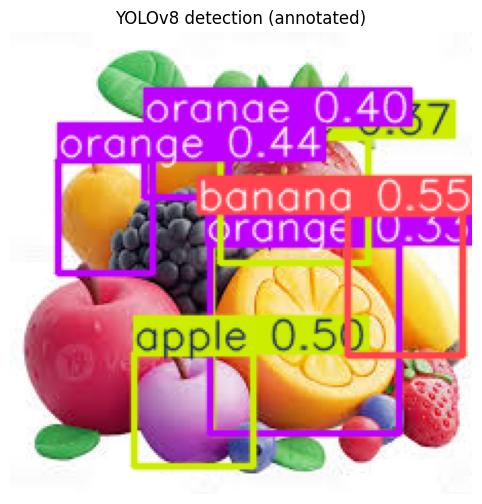

In [ ]:
# @title Step 4: Display the visual output
# result[0].plot() returns a numpy array with drawn boxes; we will display it with matplotlib
res0=results[0].cpu() # move tensors to cpu to allow numpy conversion and plot it
annotated=res0.plot()
# The plot() output on RGB
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('YOLOv8 detection (annotated)')
plt.show()

# SQL (Structured Query Language)

In [ ]:
# SQL
'''
What is SQL?
SQL is a standard language used to:
* Create and manage databases
* Store, Retrieve and Manipulate data
* Ensure data integrity and relationships between tables

In Data Science, SQL is crucial for
* Fetching and Cleaning data
* Joining multiple datasets
* Preparaing data for machine learning or visualization.
'''

In [1]:
# @title Step 1: SQLite library connects to a database
import sqlite3
# Create a connection to a new or existing database file
# If the file does not exist , it will be created automatically
conn=sqlite3.connect('school.db')
# Create a cursor object to execute SQL commands
cursor=conn.cursor()
print('Database has created and connected successfully')

Database has created and connected successfully


In [2]:
# @title Step 2: Create the table
cursor.execute(
'''
create table Students(
  ID int,
  Name varchar(50),
  Marks int
)
'''
)
print('Table Created Successfully')

Table Created Successfully


In [3]:
# @title Step 3: Insert Data into table
cursor.execute(
    '''
    insert into Students
    values
    (1, 'Alice', 85),
(2, 'Bob', 92),
(3, 'David', 78),
(4, 'Emma', 91),
(5, 'Liam', 88),
(6, 'Sophia', 95),
(7, 'Noah', 82),
(8, 'Olivia', 90),
(9, 'Mason', 76),
(10, 'Ava', 89),
(11, 'Ethan', 84),
(12, 'Isabella', 92),
(13, 'Logan', 79),
(14, 'Mia', 87),
(15, 'James', 93);
    '''
)
print("Data inserted successfully")

Data inserted successfully


In [4]:
# @title Step 4: Display the Table
cursor.execute(
    '''
    select * from Students;
    '''
)
# Fetch all the results
rows=cursor.fetchall()
for i in rows:
  print(i)

(1, 'Alice', 85)
(2, 'Bob', 92)
(3, 'David', 78)
(4, 'Emma', 91)
(5, 'Liam', 88)
(6, 'Sophia', 95)
(7, 'Noah', 82)
(8, 'Olivia', 90)
(9, 'Mason', 76)
(10, 'Ava', 89)
(11, 'Ethan', 84)
(12, 'Isabella', 92)
(13, 'Logan', 79)
(14, 'Mia', 87)
(15, 'James', 93)


In [5]:
# @title Step 5: Where Condition
cursor.execute(
    '''
    select * from Students where Marks>90;
    '''
)
rows=cursor.fetchall()
for i in rows:
  print(i)

(2, 'Bob', 92)
(4, 'Emma', 91)
(6, 'Sophia', 95)
(12, 'Isabella', 92)
(15, 'James', 93)


In [6]:
# @title Step 6: Update
cursor.execute(
    '''
    Update Students set Marks=90 where ID=1;
    '''
)
cursor.execute(
    '''
    Update Students set Marks=88 where ID=4;
    '''
)
cursor.execute(
    '''
    select Marks,Name from Students where ID=2 or ID=3;
    '''
)
rows=cursor.fetchall()
for i in rows:
  print(i)

(92, 'Bob')
(78, 'David')


In [7]:
# @title Delete Data
# Delete a record where the Student name is Alice
cursor.execute(
    '''
    delete from Students where Name='Alice';
    '''
)
cursor.execute(
    '''
    select * from Students;
    '''
)
rows=cursor.fetchall()
for i in rows:
  print(i)

(2, 'Bob', 92)
(3, 'David', 78)
(4, 'Emma', 88)
(5, 'Liam', 88)
(6, 'Sophia', 95)
(7, 'Noah', 82)
(8, 'Olivia', 90)
(9, 'Mason', 76)
(10, 'Ava', 89)
(11, 'Ethan', 84)
(12, 'Isabella', 92)
(13, 'Logan', 79)
(14, 'Mia', 87)
(15, 'James', 93)


In [8]:
# @title SQLqueries for Data Analysis
# Find Average marks of students
cursor.execute('select avg(Marks) from Students;')
rows=cursor.fetchall()
for i in rows:
  print(i)

(86.64285714285714,)


In [9]:
# Find Maximum marks of the class
cursor.execute('select Name,max(Marks) from Students;')
rows=cursor.fetchall()
for i in rows:
  print(i)

('Sophia', 95)


In [10]:
# @title Setting up the Database using csv Dataset
import sqlite3
import pandas as pd
from google.colab import files
# create connection to a new database
conn=sqlite3.connect('nba.db')
cursor=conn.cursor()

In [11]:
# Upload your csv file
uploaded=files.upload()

Saving nba.csv to nba.csv


In [12]:
# Save csv in df
df=pd.read_csv('nba.csv')
print(df.head(10))

            Name            Team  Number Position  Age  Height(Inch)  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25           6.2     180   
1    Jae Crowder  Boston Celtics      99       SF   25           6.6     235   
2   John Holland  Boston Celtics      30       SG   27           6.5     205   
3    R.J. Hunter  Boston Celtics      28       SG   22           6.5     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29           6.1     231   
5   Amir Johnson  Boston Celtics      90       PF   29           6.9     240   
6  Jordan Mickey  Boston Celtics      55       PF   21           6.8     235   
7   Kelly Olynyk  Boston Celtics      41        C   25           7.0     238   
8   Terry Rozier  Boston Celtics      12       PG   22           6.2     190   
9   Marcus Smart  Boston Celtics      36       PG   22           6.4     220   

             College      Salary  
0              Texas   7730337.0  
1          Marquette   6796117.0  
2  Boston Univ

In [13]:
!pip install -q pandasql
from pandasql import sqldf

  Preparing metadata (setup.py) ... done


In [14]:
# define a helper function
pysqldf=lambda q: sqldf(q, globals())
# example SQL Query
query='select * from df'
result=pysqldf(query)
print(result)

              Name            Team  Number Position  Age  Height(Inch)  \
0    Avery Bradley  Boston Celtics       0       PG   25           6.2   
1      Jae Crowder  Boston Celtics      99       SF   25           6.6   
2     John Holland  Boston Celtics      30       SG   27           6.5   
3      R.J. Hunter  Boston Celtics      28       SG   22           6.5   
4    Jonas Jerebko  Boston Celtics       8       PF   29           6.1   
..             ...             ...     ...      ...  ...           ...   
452     Trey Lyles       Utah Jazz      41       PF   20           6.1   
453   Shelvin Mack       Utah Jazz       8       PG   26           6.3   
454      Raul Neto       Utah Jazz      25       PG   24           6.1   
455   Tibor Pleiss       Utah Jazz      21        C   26           7.3   
456    Jeff Withey       Utah Jazz      24        C   26           7.0   

     Weight            College     Salary  
0       180              Texas  7730337.0  
1       235          Ma

In [15]:
# Example SQL Query where weight is less than 150
query='select * from df where Weight<180'
result=pysqldf(query)
print(result)

                Name                    Team  Number Position  Age  \
0       Shane Larkin           Brooklyn Nets       0       PG   23   
1          Ish Smith      Philadelphia 76ers       1       PG   27   
2          Ian Clark   Golden State Warriors      21       SG   25   
3         Chris Paul    Los Angeles Clippers       3       PG   31   
4     Louis Williams      Los Angeles Lakers      23       SG   29   
5       Phil Pressey            Phoenix Suns      25       PG   25   
6    Darren Collison        Sacramento Kings       7       PG   28   
7       Aaron Brooks           Chicago Bulls       0       PG   31   
8       Jordan McRae     Cleveland Cavaliers      12       SG   25   
9        Steve Blake         Detroit Pistons      22       PG   36   
10       Mike Conley       Memphis Grizzlies      11       PG   28   
11      Bryce Cotton       Memphis Grizzlies       8       PG   23   
12       Norris Cole    New Orleans Pelicans      30       PG   27   
13       Tim Frazier

In [16]:
# Display team name , position where players age is less than 28 for PG or SF
query="select Name,Team,Position from df where (Position='PG' or Position='SF') or Age<28"
result=pysqldf(query)
print(result)

              Name            Team Position
0    Avery Bradley  Boston Celtics       PG
1      Jae Crowder  Boston Celtics       SF
2     John Holland  Boston Celtics       SG
3      R.J. Hunter  Boston Celtics       SG
4    Jordan Mickey  Boston Celtics       PF
..             ...             ...      ...
341     Trey Lyles       Utah Jazz       PF
342   Shelvin Mack       Utah Jazz       PG
343      Raul Neto       Utah Jazz       PG
344   Tibor Pleiss       Utah Jazz        C
345    Jeff Withey       Utah Jazz        C

[346 rows x 3 columns]


In [17]:
# Find the Average age according to the Position
query="select Position,avg(Age) from df group by Position"
result=pysqldf(query)
print(result)

  Position   avg(Age)
0        C  27.371795
1       PF  27.160000
2       PG  26.847826
3       SF  26.858824
4       SG  26.539216


In [18]:
# Diplay the top 10 salaries of the players along with thier name, team and salary
query="select Name,Team,Salary from df order by Salary desc limit 10"
print(pysqldf(query))

              Name                   Team      Salary
0      Kobe Bryant     Los Angeles Lakers  25000000.0
1     LeBron James    Cleveland Cavaliers  22970500.0
2  Carmelo Anthony        New York Knicks  22875000.0
3    Dwight Howard        Houston Rockets  22359364.0
4       Chris Bosh             Miami Heat  22192730.0
5       Chris Paul   Los Angeles Clippers  21468695.0
6     Kevin Durant  Oklahoma City Thunder  20158622.0
7     Derrick Rose          Chicago Bulls  20093064.0
8      Dwyane Wade             Miami Heat  20000000.0
9      Brook Lopez          Brooklyn Nets  19689000.0


In [19]:
# Find the average salary based on Teams and display in descending order
query="select Team,avg(Salary) from df group by Team order by avg(Salary) desc"
print(pysqldf(query))

                      Team   avg(Salary)
0      Cleveland Cavaliers  7.642049e+06
1               Miami Heat  6.347359e+06
2     Los Angeles Clippers  6.323643e+06
3    Oklahoma City Thunder  6.251020e+06
4    Golden State Warriors  5.924600e+06
5            Chicago Bulls  5.785559e+06
6        San Antonio Spurs  5.629516e+06
7        Memphis Grizzlies  5.467920e+06
8        Charlotte Hornets  5.222728e+06
9       Washington Wizards  5.088576e+06
10         Houston Rockets  5.018868e+06
11           Atlanta Hawks  4.860197e+06
12      Los Angeles Lakers  4.784695e+06
13        Sacramento Kings  4.778911e+06
14        Dallas Mavericks  4.746582e+06
15         Toronto Raptors  4.741174e+06
16  Minnesota Timberwolves  4.593054e+06
17         New York Knicks  4.581494e+06
18         Detroit Pistons  4.477884e+06
19          Indiana Pacers  4.450122e+06
20    New Orleans Pelicans  4.355304e+06
21         Milwaukee Bucks  4.350220e+06
22           Orlando Magic  4.297248e+06
23          Denv

In [1]:
# @title SQL with Python (Dual Datasets)
import sqlite3
import pandas as pd
conn=sqlite3.connect('Company.db')
cursor=conn.cursor()

In [2]:
# @title Creating Employees Table
cursor.execute('''
create table Employees (
  EmpID INTEGER PRIMARY KEY AUTOINCREMENT,
  Name Text not null,
  Age int,
  DepartmentID int,
  Salary REAL,
  Experience int
)
''')

# Create Departments Table
cursor.execute('''
Create table Departments (
  DeptID INTEGER PRIMARY KEY AUTOINCREMENT,
  DeptName Text not null,
  Location Text
)
''')

In [27]:
# Departments Data
departments=[
    ('HR','Hyderabad'),
    ('IT','Mumbai'),
    ('Finanace','Delhi'),
    ('Marketing','Bangalore'),
    ('Operations','Kolkata')
    ]
cursor.executemany('Insert into Departments (DeptName,location) values (?,?)',departments)

In [28]:
# Employees Data
employees = [
    ('Alice', 30, 1, 60000, 5),
    ('Bob', 35, 2, 85000, 8),
    ('Charlie', 28, 3, 55000, 3),
    ('David', 40, 4, 95000, 10),
    ('Eva', 25, 2, 50000, 2),
    ('Frank', 45, 3, 105000, 15),
    ('Grace', 32, 1, 72000, 6),
    ('Hannah', 29, 4, 68000, 4),
    ('Ian', 38, 5, 88000, 9),
    ('Jack', 50, 2, 110000, 20),
    ('Karen', 27, 5, 56000, 3),
    ('Leo', 33, 4, 75000, 7),
    ('Mia', 26, 1, 52000, 2),
    ('Nick', 31, 3, 70000, 5),
    ('Olivia', 37, 2, 92000, 10),
    ('Paul', 42, 5, 99000, 12),
    ('Quinn', 34, 4, 78000, 8),
    ('Rita', 24, 1, 48000, 1),
    ('Sam', 29, 3, 65000, 4),
    ('Tom', 39, 2, 97000, 11)
]

cursor.executemany('Insert into Employees (Name, Age, DepartmentID, Salary, Experience) values (?,?,?,?,?)', employees)

In [29]:
'''cursor.execute('select * from Employees')
row=cursor.fetchall()
for i in row:
  print(i)'''
pd.read_sql_query('select * from Employees',conn)

,EmpID,Name,Age,DepartmentID,Salary,Experience
0,1,Alice,30,1,60000.0,5
1,2,Bob,35,2,85000.0,8
2,3,Charlie,28,3,55000.0,3
3,4,David,40,4,95000.0,10
4,5,Eva,25,2,50000.0,2
5,6,Frank,45,3,105000.0,15
6,7,Grace,32,1,72000.0,6
7,8,Hannah,29,4,68000.0,4
8,9,Ian,38,5,88000.0,9
9,10,Jack,50,2,110000.0,20


In [30]:
pd.read_sql_query('select * from Departments',conn)

,DeptID,DeptName,Location
0,1,HR,Hyderabad
1,2,IT,Mumbai
2,3,Finanace,Delhi
3,4,Marketing,Bangalore
4,5,Operations,Kolkata


In [31]:
# @title Q1 Show only the Names and Salaries of Employees
pd.read_sql_query('select Name,Salary from Employees',conn)

,Name,Salary
0,Alice,60000.0
1,Bob,85000.0
2,Charlie,55000.0
3,David,95000.0
4,Eva,50000.0
5,Frank,105000.0
6,Grace,72000.0
7,Hannah,68000.0
8,Ian,88000.0
9,Jack,110000.0


In [32]:
# @title Q2 Find Employees Names earning more than 80000
pd.read_sql_query('Select Name from Employees where Salary > 80000',conn)

,Name
0,Bob
1,David
2,Frank
3,Ian
4,Jack
5,Olivia
6,Paul
7,Tom


In [33]:
# @title Q3 List Employees Name and Experience with Experience > 5 Years
pd.read_sql_query('select Name,Experience from Employees where Experience>5',conn)

,Name,Experience
0,Bob,8
1,David,10
2,Frank,15
3,Grace,6
4,Ian,9
5,Jack,20
6,Leo,7
7,Olivia,10
8,Paul,12
9,Quinn,8


In [34]:
# @title Q4 Sort Employees by Salary (Descending)
pd.read_sql_query('select * from Employees order by Salary desc',conn)

,EmpID,Name,Age,DepartmentID,Salary,Experience
0,10,Jack,50,2,110000.0,20
1,6,Frank,45,3,105000.0,15
2,16,Paul,42,5,99000.0,12
3,20,Tom,39,2,97000.0,11
4,4,David,40,4,95000.0,10
5,15,Olivia,37,2,92000.0,10
6,9,Ian,38,5,88000.0,9
7,2,Bob,35,2,85000.0,8
8,17,Quinn,34,4,78000.0,8
9,12,Leo,33,4,75000.0,7


In [35]:
# @title Q5 Find Average Salary of all Employees
pd.read_sql_query('select avg(Salary) from Employees',conn)

,avg(Salary)
0,76000.0


In [36]:
# @title Q6 Count Total number of Employees
pd.read_sql_query('select count(*) as No_of_Employees from Employees',conn)

,No_of_Employees
0,20


In [37]:
# @title Q7 Show Employees between age 30 and 40
pd.read_sql_query('select Name,Age from Employees where Age BETWEEN 30 and 40',conn)

,Name,Age
0,Alice,30
1,Bob,35
2,David,40
3,Grace,32
4,Ian,38
5,Leo,33
6,Nick,31
7,Olivia,37
8,Quinn,34
9,Tom,39


In [38]:
# @title Q8 Show 5 Highest Paid Employee
pd.read_sql_query('select * from Employees order by Salary desc limit 5',conn)

,EmpID,Name,Age,DepartmentID,Salary,Experience
0,10,Jack,50,2,110000.0,20
1,6,Frank,45,3,105000.0,15
2,16,Paul,42,5,99000.0,12
3,20,Tom,39,2,97000.0,11
4,4,David,40,4,95000.0,10


In [39]:
# @title Q9 Find total Salary expense per Department Name
# pd.read_sql_query('select DepartmentID,sum(Salary) as Total_salary_spent from Employees group by DepartmentID order by Total_salary_spent desc',conn)
pd.read_sql_query('''
select D.DeptName,sum(E.Salary) as Total_salary
from Employees E
JOIN Departments D
on E.DepartmentID=D.DeptID
group by D.DeptName
''',conn)

,DeptName,Total_salary
0,Finanace,295000.0
1,HR,232000.0
2,IT,434000.0
3,Marketing,316000.0
4,Operations,243000.0


In [40]:
# @title Q10 Find Average Experience per Department
pd.read_sql_query('''
select D.Deptname,avg(E.Experience) as Avg_Experience
from Employees E
JOIN Departments D
on E.DepartmentId=D.DeptID
group by D.DeptName
''',conn)

,DeptName,Avg_Experience
0,Finanace,6.75
1,HR,3.50
2,IT,10.20
3,Marketing,7.25
4,Operations,8.00


In [41]:
# @title Q11 Show employees from the IT department
pd.read_sql_query('''
select E.Name,D.DeptName
from Employees E
JOIN Departments D
on E.DepartmentID=D.DeptID
where D.DeptName='IT'
''',conn)

,Name,DeptName
0,Bob,IT
1,Eva,IT
2,Jack,IT
3,Olivia,IT
4,Tom,IT


In [42]:
# @title Q12. Count Employees per department
pd.read_sql_query('''
select D.DeptName,count(*) as No_Of_Employees
from Employees E
JOIN Departments D
on E.DepartmentId=D.DeptID
group by D.DeptName
order by No_Of_Employees desc
''',conn)

,DeptName,No_Of_Employees
0,IT,5
1,Marketing,4
2,HR,4
3,Finanace,4
4,Operations,3


In [43]:
# @title Q13. Find employees with letter a consisting in thier names
pd.read_sql_query('''select Name from Employees where Name LIKE '%a%'
''',conn)

,Name
0,Alice
1,Charlie
2,David
3,Eva
4,Frank
5,Grace
6,Hannah
7,Ian
8,Jack
9,Karen


In [44]:
# @title Q14 Find Employees working in Bangalore
pd.read_sql_query('''
select E.Name,D.Location
from Employees E
JOIN Departments D
on E.DepartmentID=D.DeptID
where D.Location='Bangalore'
''',conn)

,Name,Location
0,David,Bangalore
1,Hannah,Bangalore
2,Leo,Bangalore
3,Quinn,Bangalore


In [45]:
# @title Q15 Find Department with the Maximum Average Salary
pd.read_sql_query('''
select D.DeptName,avg(E.Salary) as Avg_salary
from Employees E
JOIN Departments D
on E.DepartmentID=D.DeptID
group by D.DeptName
order by Avg_salary desc
''',conn)

,DeptName,Avg_salary
0,IT,86800.0
1,Operations,81000.0
2,Marketing,79000.0
3,Finanace,73750.0
4,HR,58000.0


In [46]:
# @title Q16 Find Employees having experience less than 3 years and salary above 40k
pd.read_sql_query('select Name,Experience,Salary from Employees where Experience<3 and Salary>40000',conn)

,Name,Experience,Salary
0,Eva,2,50000.0
1,Mia,2,52000.0
2,Rita,1,48000.0


In [47]:
# @title Q17 Increase salary by 10% for Employees in the HR department
cursor.execute('''
Update Employees
set Salary=Salary*0.1+Salary
where DepartmentID=(select DeptID from Departments where DeptName='HR')
''')

In [48]:
# @title Q18 Find employees earning above the departments average
pd.read_sql_query('''
select E.Name,E.Salary,D.DeptName
from Employees E
join Departments D
on E.DepartmentID=D.DeptID
where E.Salary > (select avg(Salary) from Employees where DepartmentID=E.DepartmentID)
''',conn)

,Name,Salary,DeptName
0,Alice,66000.0,HR
1,David,95000.0,Marketing
2,Frank,105000.0,Finanace
3,Grace,79200.0,HR
4,Ian,88000.0,Operations
5,Jack,110000.0,IT
6,Olivia,92000.0,IT
7,Paul,99000.0,Operations
8,Tom,97000.0,IT


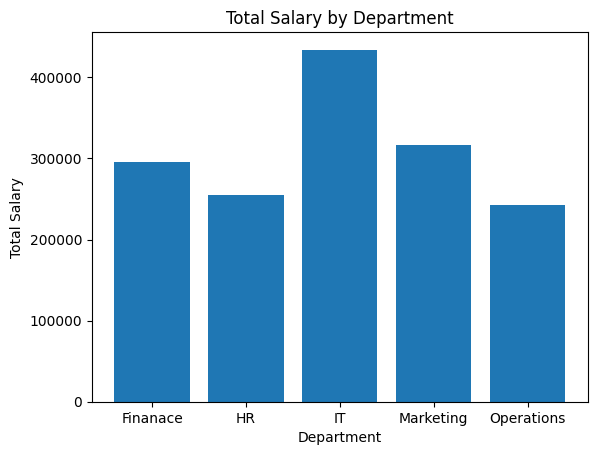

In [50]:
# @title Visualization using SQL queries
import matplotlib.pyplot as plt
df=pd.read_sql_query('''
select D.DeptName,Sum(E.Salary) as Total_Salary
from Employees E
join Departments D
on E.DepartmentID=D.DeptID
group by D.DeptName
''',conn)
plt.bar(df['DeptName'],df['Total_Salary'])
plt.title('Total Salary by Department')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.show()

# Generative Models

In [ ]:
# @title Defintion
'''
Generative Models are a class of AI models that can generate new data that resembles existing data.

Instead of just learning to classify or predict, these models learn the underlying patterns and distributions of data and can create new, similar examples.

Example:
We have created a ML model based on 1000 cat images.

Generate cat images based on trained data which will not be a part of the training.
'''

In [ ]:
# @title Real World Examples
'''
Real-World Applications of Generative Models
Domain	Application
🎨 Art	AI-generated paintings and digital art
📷 Image Processing	Image super-resolution, background generation
💬 NLP	Chatbots that write text (like ChatGPT!)
🎵 Music	Generating new tunes or lyrics
🧑‍⚕️ Healthcare	Generating synthetic medical data for training models safely
🎮 Gaming	AI that generates levels, maps, or characters
'''

In [ ]:
# @title Types of Generative models
'''
Type	                                     Description	                                                            Example
Variational Autoencoders (VAE)	           Encode and decode data to generate similar outputs	                      Image generation, denoising
Generative Adversarial Networks (GANs)	   Two models (generator & discriminator) compete to create realistic data	Deepfake videos, AI art
Autoregressive Models	                     Generate sequences like text or audio step by step	                      GPT, LSTM-based text models
Diffusion Models	                         Gradually remove noise from random data to form images	                  DALL·E 2, Stable Diffusion
'''

In [ ]:
# @title Simple Code Example - Random Image Generation
'''
Let's understand the core idea of a generator --- how AI creates 'new' data by learning from patterns.

What we'll do:
We'll create a simple fake image generator using PyTorch that:
1) Starts from random noise.
2) Transfomers it into something structured.
'''

In [2]:
# @title Step1: Important Libraries
import torch
import matplotlib.pyplot as plt

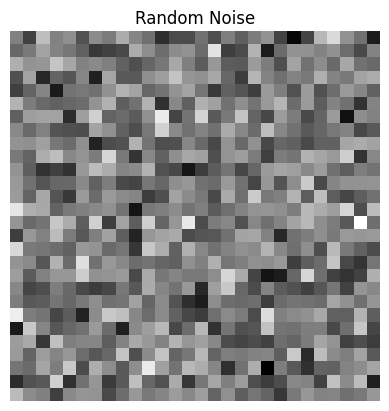

In [13]:
# @title Step2: Generate Random Noise(Image)
# A tensor of 28x28 pixels
noise=torch.randn(28,28)

# Display the noise as an image
plt.imshow(noise, cmap='gray')
plt.title('Random Noise')
plt.axis('off')
plt.show()

In [12]:
# @title Step3: Simulate a simple Generator Function
def simple_generator(noise):
  # Apply a simple transformation (nonlinear activation + scaling)
  generated=torch.tanh(noise * 2)
  return generated

# Image from 1990-45kb
# Upload the image to AI model (transforms the image)
# 45kb - 400kb

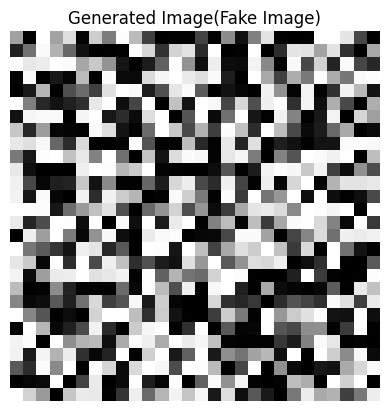

In [14]:
# @title Step4: Pass noise through the generator
improved_img=simple_generator(noise)
# Display the generated Image
plt.imshow(improved_img.detach(),cmap='gray')
plt.title('Generated Image(Fake Image)')
plt.axis('off')
plt.show()

In [ ]:
# @title Introduction to PyTorch
'''
Defintion:
PyTorch is an open-source machine learning framework developed by Facebook's AI Research Lab.
It's mainly user for deep learning, CV and NLP.

Real World Applications of PyTorch
CV  -  face recognition
NLP  -  Chatbots
Healthcare - Predicting diseaes from scans
Self-Driving Cars
Gaming
'''

In [ ]:
# @title Fundamentals Concepts of Generative AI - Autoencoders
'''
1. What are Autoencoders?
Definition:

An Autoencoder is a special type of neural network that learns to compress (encode) data into a smaller representation,
and then reconstruct (decode) it back to the original.

2. Structure of an Autoencoder
Input  →  Encoder  →  Bottleneck (Compressed)  →  Decoder  →  Output

Think of it like packing for travel:

You have to fit your whole wardrobe (input data) into one suitcase (compressed form).

You take only what’s essential (important features).

Later, you unpack (decode) — it’s not exactly the same, but close enough!

3. Real-World Applications of Autoencoders
Domain	                          Application	                              Explanation
🧩 Data Compression	             Reduce image size	                        Store key information with fewer bytes
🕵️‍♂️ Anomaly Detection	           Fraud detection in banks	                  Model learns "normal" patterns — flags what’s different
🧠 Denoising	                   Clean noisy images or audio	              Learns to remove unwanted noise
🧍‍♀️ Healthcare	                  Medical image reconstruction	             Compress and restore MRI or CT scans
🎨 Generative AI	               Basis for Variational Autoencoders (VAEs)	Generate new images or content
'''

In [1]:
# @title Step 1: Import Required Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# @title Step 2: Create Synthetic Data
# Autoencoders do not need labels
# They learn by trying to reconstruct the input itself.
data=torch.randn(100,10) # 100 samples,each with 10 features
print(data.shape)

torch.Size([100, 10])


In [9]:
# @title Step 3: Define the Autoencoder Model

# Define a simple Autoencoder class
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()

  # Encoder: reduces 10 - 5 - 2 dimensions
    self.encoder = nn.Sequential(
        nn.Linear(10,5),  # input layer (10) - hidden layer (5)
        nn.ReLU(), # non-linear activation
        nn.Linear(5,2) # hidden layer(5) - Latent code (2)
    )

    # Decoder: reconstructs 2 - 5 - 10 dimensions
    self.decoder = nn.Sequential(
        nn.Linear(2,5),
        nn.ReLU(),
        nn.Linear(5,10),
        nn.Sigmoid() # ensures output between 0 and 1
    )
  def forward(self, x):
        encoded = self.encoder(x) # Compress input
        decoded = self.decoder(encoded) # Reconstruct Input
        return decoded

In [11]:
# @title Step 4: Intialize Model, Loss Function and Optimizer

# Create Model object
model = Autoencoder()

# Define Loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define optimizer (SGD = Stohastic Gradient Descent)
optimizer = optim.SGD(model.parameters())

In [12]:
# @title Step 5: Train the Autoencoder
# Train the Model
epochs=100
losses=[]
for epoch in range(epochs):
  # Rest Gradients
  optimizer.zero_grad()
  outputs=model(data)# Forward pass (input-output)
  loss=criterion(outputs,data) # Compare output with input
  loss.backward() # Backward pass (calucate what is missing)
  optimizer.step() # Update weights
  losses.append(loss.item()) # Store loss for plotting
  if (epoch+1)%20==0:
    print(f'Epoch[{epoch+1}/{epochs},Loss:{loss.item()}]')

Epoch[20/100,Loss:1.2745661735534668]
Epoch[40/100,Loss:1.274248480796814]
Epoch[60/100,Loss:1.2739317417144775]
Epoch[80/100,Loss:1.2736154794692993]
Epoch[100/100,Loss:1.273300290107727]


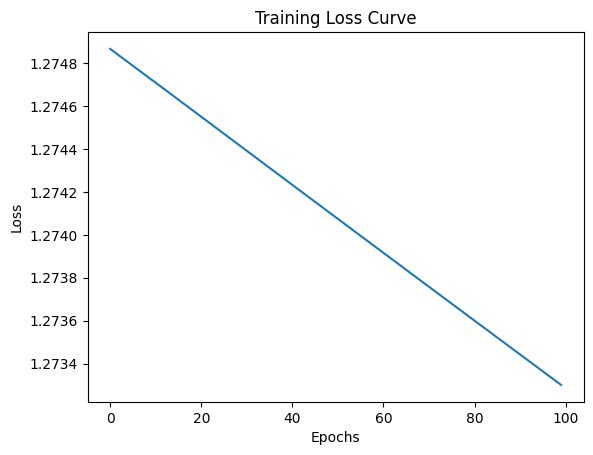

In [13]:
# @title Step 6: plt the Loss Curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()